In [1]:
import csv
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

Using TensorFlow backend.


In [2]:
DS = pd.read_csv("ObjectSubset150SentenceLength.csv")

In [3]:
DS['tag'].fillna('text', inplace=True)

In [4]:
words = list(set(DS["word"].values))
n_words = len(words)
n_words

27741

In [5]:
tags = list(set(DS["tag"].values))
n_tags = len(tags); n_tags


2

In [107]:
Chars_DS = pd.DataFrame(columns=["text_ID","char","tag"])

In [277]:
len(sentences)

5998

In [108]:
for i in range(len(DS)):
    wordList =  list(DS["word"][i])
    for j in range(len(wordList)):
        Chars_DS = Chars_DS.append({'text_ID': DS["text_ID"][i] , 'char': wordList[j], 'tag': DS["tag"][i]},ignore_index=True)
        

KeyboardInterrupt: 

In [123]:
Chars_DS.to_csv("CharsDS.csv",index=False)

In [279]:
Chars_DS = pd.read_csv("CharsDSDULL.csv")

In [280]:
Chars_DS.head()

,text_ID,char,tag
0,46809,R,object
1,46809,R,object
2,46809,1,object
3,46809,3,object
4,46809,0,object


In [281]:
len(Chars_DS)

979964

In [282]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["char"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("text_ID").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [283]:
getter = SentenceGetter(Chars_DS)

In [284]:
sentences = getter.sentences

In [285]:
sentences[53]

[('K', 'text'),
 ('a', 'text'),
 ('r', 'text'),
 ('d', 'text'),
 ('i', 'text'),
 ('o', 'text'),
 ('v', 'text'),
 ('a', 'text'),
 ('s', 'text'),
 ('k', 'text'),
 ('u', 'text'),
 ('l', 'text'),
 ('a', 'text'),
 ('a', 'text'),
 ('r', 'text'),
 ('s', 'text'),
 ('ü', 'text'),
 ('s', 'text'),
 ('t', 'text'),
 ('e', 'text'),
 ('e', 'text'),
 ('m', 'text'),
 (':', 'text'),
 ('F', 'text'),
 ('r', 'text'),
 ('.', 'text'),
 ('r', 'text'),
 ('e', 'text'),
 ('g', 'text'),
 ('u', 'text'),
 ('l', 'text'),
 ('a', 'text'),
 ('a', 'text'),
 ('r', 'text'),
 ('n', 'text'),
 ('e', 'text'),
 ('8', 'text'),
 ('0', 'text'),
 ('x', 'text'),
 ('m', 'text'),
 ('i', 'text'),
 ('n', 'text'),
 (',', 'text'),
 ('R', 'object'),
 ('R', 'object'),
 ('1', 'object'),
 ('4', 'object'),
 ('0', 'object'),
 ('/', 'object'),
 ('9', 'object'),
 ('0', 'object')]

In [286]:
max_len = 150
max_len_char = 10

In [287]:
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [288]:
tag2idx

{'object': 1, 'text': 2, 'PAD': 0}

In [289]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)


104


In [290]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1 #For predictions
char2idx["PAD"] = 0

In [291]:
idx2char = {i: w for w, i in char2idx.items()}

In [292]:
# X_char = []
# for sentence in sentences:
#     sent_seq = []
#     for i in range(max_len):
#         word_seq = []
#         for j in range(max_len_char):
#             try:
#                 word_seq.append(char2idx.get(sentence[i][0][j]))
#             except:
#                 word_seq.append(char2idx.get("PAD"))
#         sent_seq.append(word_seq)
#     X_char.append(np.array(sent_seq))

from keras.preprocessing.sequence import pad_sequences
X_char = [[char2idx[w[0]] for w in s] for s in sentences]
X_char = pad_sequences(maxlen=max_len, sequences=X_char, value=char2idx["PAD"], padding='post', truncating='post')

In [293]:
y = [[tag2idx[w[1]] for w  in s] for s in sentences]


In [294]:
len(sentences)

13643

In [295]:
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

In [296]:
X_char[1].shape

(150,)

In [297]:
tag2idx

{'object': 1, 'text': 2, 'PAD': 0}

In [298]:
from sklearn.model_selection import train_test_split
X_char_tr, X_char_te, y_tr,  y_te= train_test_split(X_char, y, test_size=0.2, random_state=2018)


In [299]:
char2idx

{'m': 2,
 'N': 3,
 ':': 4,
 '1': 5,
 '[': 6,
 'Ü': 7,
 'e': 8,
 'W': 9,
 'z': 10,
 '´': 11,
 ')': 12,
 'u': 13,
 '6': 14,
 'Ä': 15,
 'ä': 16,
 'n': 17,
 '#': 18,
 'U': 19,
 'R': 20,
 'Z': 21,
 'p': 22,
 ',': 23,
 's': 24,
 '7': 25,
 '&': 26,
 '�': 27,
 'i': 28,
 'j': 29,
 'q': 30,
 'g': 31,
 '`': 32,
 'A': 33,
 'L': 34,
 'S': 35,
 'ž': 36,
 'y': 37,
 'F': 38,
 '½': 39,
 '%': 40,
 '2': 41,
 'G': 42,
 ']': 43,
 'f': 44,
 'x': 45,
 'M': 46,
 'Ö': 47,
 '<': 48,
 '4': 49,
 'ˇ': 50,
 '*': 51,
 'r': 52,
 ';': 53,
 '\\': 54,
 '3': 55,
 't': 56,
 "'": 57,
 'k': 58,
 'd': 59,
 'Õ': 60,
 '?': 61,
 'Q': 62,
 'w': 63,
 'B': 64,
 '"': 65,
 'b': 66,
 'H': 67,
 '5': 68,
 'E': 69,
 '0': 70,
 'K': 71,
 '/': 72,
 '.': 73,
 'ü': 74,
 '9': 75,
 'T': 76,
 '+': 77,
 '–': 78,
 'D': 79,
 'X': 80,
 '(': 81,
 'P': 82,
 '>': 83,
 'O': 84,
 '!': 85,
 'V': 86,
 '°': 87,
 'a': 88,
 'ö': 89,
 'h': 90,
 '8': 91,
 'C': 92,
 'l': 93,
 'Y': 94,
 'J': 95,
 'v': 96,
 '_': 97,
 'c': 98,
 'I': 99,
 '~': 100,
 '=': 101,
 'š':

In [300]:
X_char[2]

array([  5,  25,  73,   5,  41,  73,  41,  70,   5,  70, 104,  71,  88,
         8,  66,  13,  24,  56,   8,  56,  88,  73,  20,  20,   5,  70,
        70,  72,  25,  70,  23,   5,  70,  70,  72,  14,  70,  73,  82,
         8,  88,  52,  28,  17,  31,  93,  13,  24,  22, 103,  93,   8,
        58, 103,  52,  59,  13,  17,  13,  59,  73,  84,  56,  24,  13,
        24,  56,  88,  56,  13,  59,  88,  24,   8,  56,  88,  59,  88,
         8,   2,  88,  58,  88,  58,  88,   8,  93,  88,  93,   8,  56,
        13,  31,  28, 105,   2,  66,  93,  13,  24,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

In [301]:
y[1]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [302]:
n_tags

2

In [304]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D


# input and embeddings for characters
char_in = Input(shape=(max_len,))

emb_char = Embedding(input_dim=n_chars + 2, output_dim=20,
                           input_length=max_len)(char_in)
# character LSTM to get word encodings by characters
# WE use TimeDistributed to apply LSTM to each of the timesteps, independently:
# The trick here is, to wrap the parts that should be applied to the characters in a TimeDistributed layer to apply the same layers to every character sequence.


x = SpatialDropout1D(0.3)(emb_char)

char_enc = Bidirectional(LSTM(units=20, return_sequences=True,
                                recurrent_dropout=0.5))(x)

# main LSTM
# main_lstm = Bidirectional(LSTM(units=50, return_sequences=True,
#                                recurrent_dropout=0.6))(x)
# Time Distributed Dense applies the same dense layer to every time step during GRU/LSTM Cell unrolling.
#Using return_sequences=False, the Dense layer will get applied only once in the last cell. This is normally the case when RNNs are used for classification problems. 
#If return_sequences=True, then the Dense layer is used to apply at every timestep just like TimeDistributedDense.


out = TimeDistributed(Dense(n_tags + 1, activation="softmax"))(char_enc)
a
model = Model( char_in, out)
 




In [305]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 150)               0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 150, 20)           2120      
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 150, 20)           0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 150, 40)           6560      
_________________________________________________________________
time_distributed_21 (TimeDis (None, 150, 3)            123       
Total params: 8,803
Trainable params: 8,803
Non-trainable params: 0
_________________________________________________________________


In [306]:
a = np.array(X_char_tr).reshape((len(X_char_tr), max_len,))

In [307]:
a.shape

(10914, 150)

In [308]:
X_char_tr[1].shape

(150,)

In [309]:
from keras.callbacks import ModelCheckpoint

# Saving the best model only
filepath="CharEmbcharsOnly-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the best model
history = model.fit(np.array(X_char_tr).reshape((len(X_char_tr), max_len,)),
                    np.array(y_tr).reshape(len(y_tr), max_len, 1),
                    batch_size=32, epochs=10, validation_split=0.1, verbose=1,callbacks=callbacks_list)


C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9822 samples, validate on 1092 samples
Epoch 1/10
9822/9822 [==============================] - 39s 4ms/step - loss: 0.2590 - acc: 0.9286 - val_loss: 0.0744 - val_acc: 0.9775

Epoch 00001: val_acc improved from -inf to 0.97753, saving model to CharEmbcharsOnly-0.98.hdf5
Epoch 2/10
9822/9822 [==============================] - 38s 4ms/step - loss: 0.0646 - acc: 0.9802 - val_loss: 0.0519 - val_acc: 0.9835

Epoch 00002: val_acc improved from 0.97753 to 0.98355, saving model to CharEmbcharsOnly-0.98.hdf5
Epoch 3/10
9822/9822 [==============================] - 37s 4ms/step - loss: 0.0523 - acc: 0.9834 - val_loss: 0.0463 - val_acc: 0.9844

Epoch 00003: val_acc improved from 0.98355 to 0.98438, saving model to CharEmbcharsOnly-0.98.hdf5
Epoch 4/10
9822/9822 [==============================] - 36s 4ms/step - loss: 0.0477 - acc: 0.9847 - val_loss: 0.0437 - val_acc: 0.9852

Epoch 00004: val_acc improved from 0.98438 to 0.98518, saving model to CharEmbcharsOnly-0.99.hdf5
Epoch 5/10
9822/982

In [310]:
hist = pd.DataFrame(history.history)


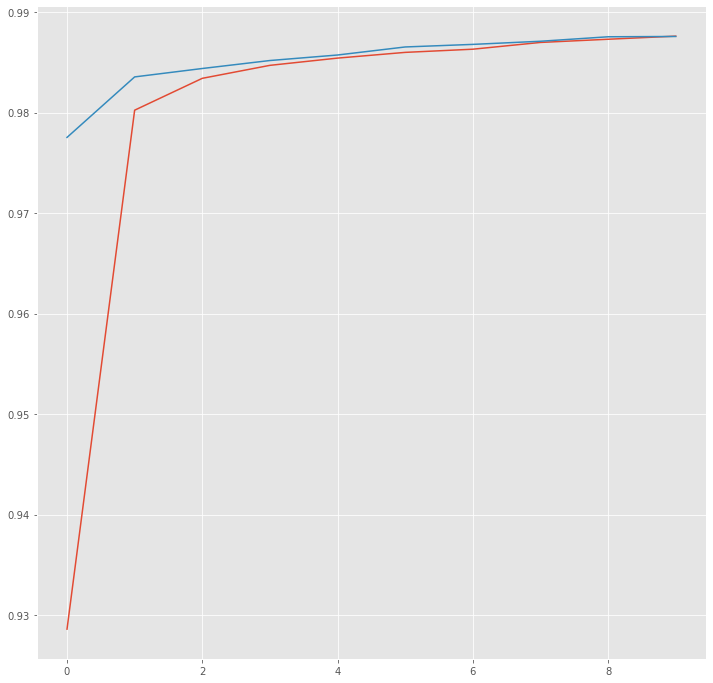

In [311]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()


In [312]:
y_pred = model.predict(
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len,)))


In [313]:
y_pred[1]

array([[1.67349202e-03, 7.67938346e-02, 9.21532691e-01],
       [3.62883322e-04, 3.95803638e-02, 9.60056722e-01],
       [3.34400014e-04, 2.97580287e-02, 9.69907522e-01],
       [6.84849801e-05, 1.50034493e-02, 9.84928071e-01],
       [5.60054177e-05, 1.56843197e-02, 9.84259665e-01],
       [9.82026831e-05, 1.93347167e-02, 9.80567038e-01],
       [5.91009193e-05, 1.38553008e-02, 9.86085534e-01],
       [3.73791590e-05, 1.81293394e-02, 9.81833279e-01],
       [3.07934170e-05, 1.90221295e-02, 9.80947077e-01],
       [3.85111780e-05, 2.54318956e-02, 9.74529564e-01],
       [4.32015113e-05, 4.52796184e-02, 9.54677165e-01],
       [8.37729167e-05, 5.70775084e-02, 9.42838728e-01],
       [1.05390260e-04, 7.32771307e-02, 9.26617503e-01],
       [7.32484914e-05, 5.56423180e-02, 9.44284379e-01],
       [4.96084904e-05, 6.06987923e-02, 9.39251602e-01],
       [1.29779510e-04, 4.81492281e-02, 9.51721013e-01],
       [8.61681547e-05, 4.15959731e-02, 9.58317935e-01],
       [4.93864536e-05, 3.60710

In [314]:
X_char_te[1020]

array([  5,  25,  73,  70,   5,  73,  41,  70,   5,  41, 104,  71, 103,
        22,  24,  13,  59,   8,  88,  13,  24,  58,  13,  93,  56,  88,
        56,  24,  28, 103, 103,  17,  28,  93,  66,  28,  93,  73,  58,
        88,  52,   8,  17,   8,  17,  13,  59,  90,  72,  58,  73,  20,
        20,   5,  14,  70,  72,   5,  70,  70,   2,   2,  67,  31,  73,
        35,  22,  84,  41,  75,   5, 104,  75,  41,  40,  23,  44,  52,
        73,  91,  70,  45,  72,   2,  28,  17,  73,  73,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

In [315]:
def charindx2word(Tword):
    word = []
    for i in range(len(Tword)):
        if(Tword[i] !=0):
            word.append(idx2char[Tword[i]])
    return "".join(word)

In [316]:
i = 1050
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_char_te[i], y_te[i], p):
    if t != 0: #PAD
        print("{:15}: {:5} {}".format(idx2char[w], idx2tag[t], idx2tag[pred]))


Word           ||True ||Pred
H              : text  text
i              : text  text
n              : text  text
g              : text  text
a              : text  text
m              : text  text
i              : text  text
s              : text  text
s              : text  text
ü              : text  text
s              : text  text
t              : text  text
e              : text  text
e              : text  text
m              : text  text
:              : text  text
K              : text  text
o              : text  text
p              : text  text
s              : text  text
u              : text  text
d              : text  text
e              : text  text
s              : text  text
v              : text  text
e              : text  text
s              : text  text
i              : text  text
k              : text  text
u              : text  text
l              : text  text
a              : text  text
a              : text  text
r              : text  text
n              : te

In [317]:
len(y_pred)

2729

### Wrong Tags


In [318]:
j = 0
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")

for i in range(len(y_pred)):
    p = np.argmax(y_pred[i], axis=-1)
    for w, t, pred in zip(X_char_te[i], y_te[i], p):
        if idx2char[w] != "": #PAD
            if idx2tag[t] != idx2tag[pred]:
                print("{:15}: {:5} {}".format(idx2char[w], idx2tag[t], idx2tag[pred]))
                j = j+1


Word           ||True ||Pred
4              : object text
3              : object text
,              : object text
m              : object text
m              : object text
H              : object text
g              : object text
.              : object text
m              : object text
m              : object text
H              : object text
g              : object text
.              : object text
p              : object text
u              : object text
h              : object text
t              : object text
a              : object text
d              : object text
.              : object text
m              : text  object
m              : text  object
H              : text  object
g              : text  object
m              : text  object
m              : text  object
H              : text  object
g              : text  object
m              : text  object
m              : text  object
H              : text  object
g              : text  object
,              : text  object
/

m              : object text
H              : object text
g              : object text
,              : object text
m              : object text
m              : text  object
m              : object text
m              : object text
H              : object text
g              : object text
m              : text  object
v              : text  object
/              : text  object
5              : text  object
m              : object text
H              : object text
x              : object text
1              : object text
m              : object text
i              : object text
n              : object text
,              : object text
/              : text  object
9              : text  object
0              : text  object
m              : text  object
m              : text  object
H              : text  object
g              : text  object
R              : text  object
-              : text  object
1              : text  object
t              : text  object
b              : text  obje

/              : text  object
8              : text  object
0              : text  object
9              : text  object
0              : text  object
m              : text  object
m              : text  object
m              : object text
m              : object text
H              : object text
g              : object text
,              : object text
i              : text  object
-              : text  object
1              : text  object
5              : text  object
0              : text  object
/              : text  object
9              : text  object
k              : text  object
m              : object text
H              : object text
g              : object text
m              : object text
m              : object text
H              : object text
g              : object text
m              : text  object
õ              : text  object
.              : object text
,              : object text
m              : text  object
õ              : text  object
8              : text  o

m              : object text
H              : object text
g              : object text
,              : object text
m              : object text
m              : object text
h              : object text
g              : object text
.              : object text
.              : object text
l              : object text
e              : object text
i              : object text
a              : object text
,              : object text
R              : text  object
m              : text  object
m              : text  object
/              : text  object
s              : text  object
=              : text  object
1              : text  object
2              : text  object
4              : text  object
/              : text  object
7              : text  object
8              : text  object
m              : object text
H              : object text
g              : object text
.              : object text
m              : text  object
m              : text  object
H              : text  object

m              : text  object
m              : text  object
/              : text  object
H              : text  object
o              : text  object
m              : text  object
a              : text  object
8              : text  object
0              : text  object
m              : object text
m              : object text
h              : object text
g              : object text
m              : object text
m              : object text
H              : object text
g              : object text
,              : object text
o              : object text
n              : object text
g              : object text
i              : object text
8              : text  object
0              : text  object
k              : text  object
u              : text  object
n              : text  object
i              : text  object
1              : text  object
5              : text  object
0              : text  object
-              : text  object
1              : text  object
6              : text  

s              : object text
e              : object text
p              : object text
t              : object text
i              : object text
.              : object text
1              : text  object
7              : text  object
2              : text  object
m              : text  object
=              : text  object
1              : text  object
0              : text  object
0              : text  object
m              : text  object
m              : text  object
/              : text  object
g              : text  object
m              : object text
H              : object text
g              : object text
Ü              : object text
l              : object text
e              : object text
k              : object text
a              : object text
a              : object text
l              : object text
u              : object text
l              : object text
i              : object text
n              : object text
e              : object text
.              : object text
V 

In [319]:
j

4951

In [320]:
i = 2
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_char_te[i], y_te[i], p):
    if t != 0: #PAD
        print("{:15}: {:5} {}".format(idx2char[w], idx2tag[t], idx2tag[pred]))


Word           ||True ||Pred
K              : text  text
a              : text  text
r              : text  text
d              : text  text
i              : text  text
o              : text  text
v              : text  text
a              : text  text
s              : text  text
k              : text  text
u              : text  text
l              : text  text
a              : text  text
a              : text  text
r              : text  text
s              : text  text
ü              : text  text
s              : text  text
t              : text  text
e              : text  text
e              : text  text
m              : text  text
:              : text  text
R              : object object
R              : object object
1              : object object
0              : object object
5              : object object
/              : object object
7              : object object
0              : object object
m              : text  text
m              : text  text
H              : text  

In [321]:
from seqeval.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "text"))
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PAD", "text"))
        out.append(out_i)
    return out

pred_labels = pred2label(y_pred)
test_labels = test2label(y_te)

print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))
print(classification_report(test_labels, pred_labels))


F1-score: 59.3%
           precision    recall  f1-score   support

     text       0.68      0.70      0.69      4379
   object       0.37      0.40      0.39      2028

micro avg       0.58      0.61      0.59      6407
macro avg       0.58      0.61      0.59      6407



In [322]:
accuracy_score(test_labels, pred_labels)

0.9879101013802369

In [323]:
from sklearn_crfsuite.metrics import flat_classification_report,flat_accuracy_score
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)
print("Accuracy",flat_accuracy_score(y_pred=pred_labels, y_true=test_labels))

              precision    recall  f1-score   support

      object       0.91      0.83      0.87     19784
        text       0.99      1.00      0.99    389566

    accuracy                           0.99    409350
   macro avg       0.95      0.91      0.93    409350
weighted avg       0.99      0.99      0.99    409350

Accuracy 0.9879101013802369


In [324]:
np.array(y_predNew[1]).shape

(150,)

In [326]:
from sklearn_crfsuite.metrics import flat_f1_score, flat_precision_score, flat_recall_score
def pred2label2(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(p_i)
        out.append(out_i)
    return out
y_predNew = pred2label2(y_pred)
print(flat_recall_score(y_pred=np.array(y_predNew) , y_true= y_te ,average = "weighted"))
print(flat_f1_score(y_pred=np.array(y_predNew),  y_true= y_te ,average = "weighted"))
print(flat_precision_score(y_pred=np.array(y_predNew), y_true= y_te ,average = "weighted"))


0.9879052155856847
0.9876502224484934
0.9876131864541178
